In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Chapter21

## 21.1 Tutorial Dataset

In [ ]:
#import dataset 
df = pd.read_csv('.././data/csv/11-GaussianNaiveBayes.csv')

In [28]:
x1 = list(df['Gaussian Naïve Bayes'][3:13])
x1 = [float(s) for s in x1]

x2 = list(df['Unnamed: 1'][3:13])
x2 = [float(s) for s in x2]

Text(0,0.5,'x2')

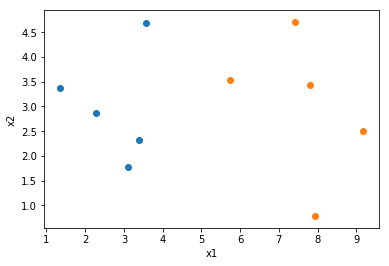

In [11]:
fig = plt.figure()

plt.scatter(x1[:len(x1)//2],x2[:len(x2)//2])
plt.scatter(x1[len(x1)//2:],x2[len(x2)//2:])
plt.xlabel("x1")
plt.ylabel("x2")

## 21.3.1 Class Probabilities

In [15]:
def count_specified_value(target_value, _list):
    cnt = 0
    for i in _list:
        if i == target_value:
            cnt += 1
    return cnt

In [22]:
y = df['Unnamed: 2'][3:13]
y = [float(s) for s in y]

y0 = count_specified_value(0,y)
y1 = count_specified_value(1,y)

p0 = y0/(y0+y1)
print('P0：'+str(p0))
print('---------')
p1 = y1/(y0+y1)
print('P1：'+str(p1))

P0：0.5
---------
P1：0.5


## 21.3.2 Conditional Probabilities

In [41]:
import statistics
x1_y0_mean = statistics.mean(x1[:len(x1)//2])
print("x1_y0_mean："+str(x1_y0_mean))
x1_y1_mean = statistics.mean(x1[len(x1)//2:])
print("x1_y1_mean："+str(x1_y1_mean))

x2_y0_mean = statistics.mean(x2[:len(x2)//2])
print("x2_y0_mean："+str(x2_y0_mean))
x2_y1_mean = statistics.mean(x2[len(x2)//2:])
print("x2_y1_mean："+str(x2_y1_mean))

x1_y0_mean：2.7420144012
x1_y1_mean：7.6146523718
x2_y0_mean：3.0054686692
x2_y1_mean：2.9914679790000003


In [43]:
x1_y0_stdev = statistics.stdev(x1[:len(x1)//2])
print("x1_y0_stdev："+str(x1_y0_stdev))
x1_y1_stdev = statistics.stdev(x1[len(x1)//2:])
print("x1_y1_stdev："+str(x1_y1_stdev))

x2_y0_stdev = statistics.stdev(x2[:len(x2)//2])
print("x2_y0_stdev："+str(x2_y0_stdev))
x2_y1_stdev = statistics.stdev(x2[len(x2)//2:])
print("x2_y1_stdev："+str(x2_y1_stdev))

x1_y0_stdev：0.9265683289298018
x1_y1_stdev：1.2344321550313704
x2_y0_stdev：1.1073295894898725
x2_y1_stdev：1.4541931384601618


## 21.4 Make Prediction with Gaussian Naive Bayes

In [51]:
import math
def pdf(value,mean,std):
    return 1/(std*(2*math.pi)**0.5)*math.e**-((value-mean)**2/(2*std**2))

In [60]:
x1 = list(df['Gaussian Naïve Bayes'][25:35])
x1 = [float(s) for s in x1]

print("--------P(pdf(x1)|Y=0)--------")
pdf_x1_y0 = []
for i in x1:
    ans = pdf(i,x1_y0_mean,x1_y0_stdev)
    pdf_x1_y0.append(ans)
    print(ans)
    
x2 = list(df['Unnamed: 1'][25:35])
x2 = [float(s) for s in x2]

print("--------P(pdf(x2)|Y=0)--------")
pdf_x2_y0 = []
for i in x2:
    ans = pdf(i,x2_y0_mean,x2_y0_stdev)
    pdf_x2_y0.append(ans)
    print(ans)
    
print("--------Output Y=0--------")
output_y0 = []
for i in range(len(pdf_x2_y0)):
    ans = pdf_x1_y0[i]*pdf_x2_y0[i]*p0
    output_y0.append(ans)
    print(ans)

--------P(pdf(x1)|Y=0)--------
0.3362559189806222
0.39789537964422417
0.1378989256527223
0.28539525215390316
0.38030115759804806
1.2328271766438062e-06
0.002254526671779386
1.5003336416741338e-11
1.5196175162923096e-07
6.318136633411705e-08
--------P(pdf(x2)|Y=0)--------
0.29932128413549713
0.19559060386412516
0.3414378694988815
0.11495884192721373
0.35746801170840853
0.11225550899085125
0.32148821825264823
0.32610077857613606
0.3354277026970906
0.04883074555526275
--------Output Y=0--------
0.05032427673372076
0.03891229878967957
0.02354195769052508
0.016404353839568928
0.06797274932849018
6.919582110595227e-08
0.00036240188135671394
2.4462998433695227e-12
2.5486090623409403e-08
1.5425966116475567e-09


In [62]:
print("--------P(pdf(x1)|Y=1)--------")
pdf_x1_y1 = []
for i in x1:
    ans = pdf(i,x1_y1_mean,x1_y1_stdev)
    pdf_x1_y1.append(ans)
    print(ans)
    
print("--------P(pdf(x2)|Y=1)--------")
pdf_x2_y1 = []
for i in x2:
    ans = pdf(i,x2_y1_mean,x2_y1_stdev)
    pdf_x2_y1.append(ans)
    print(ans)
    
print("--------Output Y=0--------")
output_y1 = []
for i in range(len(pdf_x2_y1)):
    ans = pdf_x1_y1[i]*pdf_x2_y1[i]*p1
    output_y1.append(ans)
    print(ans)

--------P(pdf(x1)|Y=1)--------
0.0009340506299685852
0.00041486723880612524
8.049754130439041e-07
0.0015573221630848745
2.848450435660791e-05
0.3193246934374877
0.10264594879667971
0.14579890306715512
0.3198314479712074
0.31215873901519764
--------P(pdf(x2)|Y=1)--------
0.2474752012176147
0.19407231695876162
0.2652782467174633
0.13989465220040678
0.2733360347029761
0.1379617648530351
0.2558965839320992
0.2597723928760463
0.2624636835757837
0.08737062963391638
--------Output Y=0--------
0.0001155771837994577
4.025712313269429e-05
1.0677123311147636e-07
0.00010893052118437184
3.892920735657427e-06
0.0220272991338951
0.013133373825769753
0.018937264964228807
0.04197206997894985
0.0136367527867436


## Final Prediction

In [66]:
prediction = []
acc_cnt = 0

for i in range(len(output_y0)):
    if output_y0[i] > output_y1[i]:
        print(0)
        prediction.append(0)
        if y[i] == 0:
            acc_cnt += 1
    else:
        print(1)
        prediction.append(1)
        if y[i] == 1:
            acc_cnt += 1
print('-----------------------')
print('Accuracy：'+str(acc_cnt/len(prediction)*100))

0
0
0
0
0
1
1
1
1
1
-----------------------
Accuracy：100.0


## Chapter 23

In [69]:
#import dataset 
df = pd.read_csv('.././data/csv/12-KNearestNeighbors.csv')

## 23.1 Tutorial Dataset

In [71]:
x1 = list(df['K-Nearest Neighbors'][3:13])
x1 = [float(s) for s in x1]

x2 = list(df['Unnamed: 1'][3:13])
x2 = [float(s) for s in x2]

[2.331273381,
 1.781539638,
 3.368360954,
 4.67917911,
 2.866990263,
 4.696522875,
 3.533989803,
 2.511101045,
 3.424088941,
 0.791637231]

Text(0,0.5,'x2')

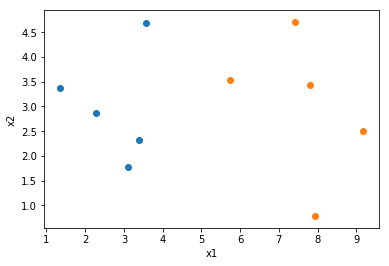

In [72]:
fig = plt.figure()

plt.scatter(x1[:len(x1)//2],x2[:len(x2)//2])
plt.scatter(x1[len(x1)//2:],x2[len(x2)//2:])
plt.xlabel("x1")
plt.ylabel("x2")

## 23.2 KNN and Euclidean Distance

In [ ]:
x1 = list(df['K-Nearest Neighbors'][19:21])
x1 = [float(s) for s in x1]

x2 = list(df['Unnamed: 1'][19:21])
x2 = [float(s) for s in x2]

In [80]:
squared_difference1 = (x1[0] - x1[1])**2
print("Squared Difference1 = "+str(squared_difference1))
squared_difference2 = (x2[0] - x2[1])**2
print("Squared Difference2 = "+str(squared_difference2))
print("SumSquared Difference = "+str(squared_difference1+squared_difference2))
print("Distance = "+str((squared_difference1+squared_difference2)**0.5))

Squared Difference1 = 0.08034941739783397
Squared Difference2 = 0.30220718819279
SumSquared Difference = 0.382556605590624
Distance = 0.6185116050573538


## 23.3 Making Predictions with KNN

In [82]:
x_1_1 = 8.093607318
x_2_1 = 3.365731514
Y = 1

In [85]:
x1 = list(df['Unnamed: 1'][29:39])
x1 = [float(s) for s in x1]

x2 = list(df['Unnamed: 2'][29:39])
x2 = [float(s) for s in x2]

prediction_y = list(df['Unnamed: 3'][29:39])
prediction_y = [float(s) for s in prediction_y]

In [87]:
def calculate_squared_difference(_list,instance_x):
    squared_difference = []
    for i in _list:
        squared_difference.append((i-instance_x)**2)
    return squared_difference

In [89]:
# calculate (X1-X1_1)**2
squared_difference1 = calculate_squared_difference(x1,x_1_1)
squared_difference1

[22.090696611291854,
 24.83560948458981,
 45.55977961510749,
 20.35194747421385,
 33.793816023219726,
 0.44912833286798104,
 5.515712095797413,
 1.1632944864861783,
 0.09049498090740273,
 0.02365028788982297]

In [90]:
# calculate (X2-X2_1)**2
squared_difference2 = calculate_squared_difference(x2,x_2_1)
squared_difference2

[1.0701036289298462,
 2.5096638999844,
 6.913954713598743e-06,
 1.7251445874381781,
 0.2487428354490452,
 1.7710056465122328,
 0.028310851817207428,
 0.7303932385431599,
 0.003405589286060305,
 6.625961377773284]

In [94]:
sum_squared_difference = []
distance = []
for i in range(len(squared_difference1)):
    sum_squared_difference.append(squared_difference1[i]+squared_difference2[i])
    distance.append((squared_difference1[i]+squared_difference2[i])**0.5)
sum_squared_difference

[23.1608002402217,
 27.34527338457421,
 45.5597865290622,
 22.077092061652028,
 34.04255885866877,
 2.220133979380214,
 5.5440229476146206,
 1.8936877250293382,
 0.09390057019346303,
 6.649611665663107]

In [95]:
distance

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [103]:
neighbors = [prediction_y[5],prediction_y[7],prediction_y[8]]
prediction = statistics.mode(neighbors)
print("Prediction："+str(prediction))

Prediction：1.0


## Chapter 25

In [106]:
#import dataset 
df = pd.read_csv('.././data/csv/13-LearningVectorQuantization.csv')

In [109]:
x1 = list(df['Learning Vector Quantization'][3:13])
x1 = [float(s) for s in x1]

x2 = list(df['Unnamed: 1'][3:13])
x2 = [float(s) for s in x2]

Text(0,0.5,'x2')

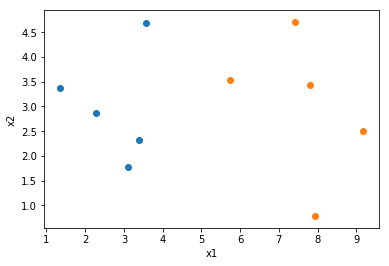

In [111]:
fig = plt.figure()

plt.scatter(x1[:len(x1)//2],x2[:len(x2)//2])
plt.scatter(x1[len(x1)//2:],x2[len(x2)//2:])
plt.xlabel("x1")
plt.ylabel("x2")

## 25.2.2 Update Codebook Vectors for One Pattern

In [113]:
def calculate_squared_difference(x1,x2):
    squared_difference = []
    for i in range(len(x1)):
        squared_difference.append((x1[i]-x2[i])**2)
    return squared_difference

In [241]:
codebook_vectors_x1 = list(df['Unnamed: 1'][27:67])
codebook_vectors_x1 = [float(s) for s in codebook_vectors_x1]

codebook_vectors_x2 = list(df['Unnamed: 2'][27:67])
codebook_vectors_x2 = [float(s) for s in codebook_vectors_x2]

input_x1 = list(df['Unnamed: 4'][27:67])
input_x1 = [float(s) for s in input_x1]

input_x2 = list(df['Unnamed: 5'][27:67])
input_x2 = [float(s) for s in input_x2]

In [136]:
# (X1-X1)**2
squared_difference1 = calculate_squared_difference(codebook_vectors_x1,input_x1)
                                                   
# (x2-X2)^2                                  
squared_difference2 = calculate_squared_difference(codebook_vectors_x2,input_x2)

In [137]:
print('-----------(X1-X1)**2-----------')
for i in squared_difference1:
    print(i)

-----------(X1-X1)**2-----------
0.03563065131981063
19.35340293809507
20.66873099646921
0.0
0.11565983209995255
21.92777292536916
23.32645931028011
0.08034941739783397
3.4905114288271917
41.58927403634262
43.50737411945567
4.201370033966383
0.13704372054043562
17.728221315930533
18.9880395948419
1.5526312197576744
0.8681346515073286
30.386785744284364
32.02946913231439
11.6978378327053
23.654150429581914
0.13641686587127813
0.26665230636001547
2.968261396214491
10.14529727132398
4.193204230564842
3.36098928599281
0.0019784130212160246
43.722312286445636
1.902703367211588
8.277857432147782
12.051978648352154
27.383240431963827
0.9323246505130212
2.2432294570390674
4.377346194829083
28.943723705670497
1.2378941918100954
0.3556449776598925
5.014232389240831


In [138]:
print('-----------(X2-X2)**2-----------')
for i in squared_difference2:
    print(i)

-----------(X2-X2)**2-----------
2.370479474386822
0.0
0.2869925776598019
5.512661312271021
0.007716374729038424
0.30220718819279
1.1782030593128907
8.396314509692438
2.4350617740825915
1.0755506340710304
0.25137256979381745
1.71824423809924
8.244286756567279
5.512661312271021
3.284028417191189
0.8419396763015985
1.1216880567642353
0.2869925776598019
0.0
11.370805186932376
4.610733834678041
5.594405168867258
3.347189578371544
2.3793983103754837
0.9696909415031034
1.4465267917484819
0.3765949044047312
7.317365363288045
0.0014561772811318683
0.032337988739696996
1.4568266585156544
13.89762366131169
0.7653240383322799
1.4852173202207553
0.08643767522011678
7.92402105456225
3.0892410883779267
1.998708247133536
7.401950379441079
29.67433546621778


In [157]:
print('-----------SUM-----------')
sum_squared_difference = []
for i in range(len(squared_difference2)):
    _sum = squared_difference1[i]+squared_difference2[i]
    print(_sum)
    sum_squared_difference.append(_sum)

-----------SUM-----------
2.4061101257066326
19.35340293809507
20.955723574129014
5.512661312271021
0.12337620682899098
22.229980113561947
24.504662369593003
8.476663927090271
5.925573202909783
42.66482467041365
43.758746689249485
5.9196142720656235
8.381330477107715
23.240882628201554
22.27206801203309
2.394570896059273
1.9898227082715638
30.673778321944166
32.02946913231439
23.068643019637676
28.264884264259955
5.730822034738536
3.61384188473156
5.347659706589974
11.114988212827082
5.639731022313324
3.7375841903975413
7.31934377630926
43.72376846372677
1.9350413559512851
9.734684090663436
25.949602309663845
28.148564470296108
2.4175419707337764
2.329667132259184
12.301367249391333
32.032964794048425
3.236602438943631
7.757595357100971
34.688567855458615


In [158]:
print('-----------Distance-----------')
distance = []
for i in sum_squared_difference:
    print(i**0.5)
    distance.append(i**0.5)

-----------Distance-----------
1.551164119526568
4.39925027
4.577742191750101
2.347905729
0.3512494937063838
4.714867984743788
4.950218416352253
2.9114710932946375
2.4342500288404607
6.531831647433486
6.615039432176462
2.433025744225824
2.8950527589506403
4.820879860378347
4.71932919089494
1.5474401106534859
1.4106107571798692
5.538391311738831
5.659458378
4.8029827211471074
5.3164729157835415
2.393913539528639
1.9010107534497431
2.3125007473706845
3.3339148478668563
2.374811786713491
1.9332832669832791
2.705428575347954
6.612395062587138
1.3910576393346485
3.1200455270177447
5.094075216333564
5.305522073302128
1.5548446773661273
1.5263247138991047
3.507330501876225
5.65976720316732
1.7990559854945123
2.7852460137483317
5.889700149876784


In [230]:
def bmu(distance):
    bmu_dict = {}
    _min = min(distance)
    
    for i in distance:
        if i == _min:
            bmu_dict[i] = "BMU"
        else:
            bmu_dict[i] = "-"
    return bmu_dict

In [245]:
codebook_vectors_y = list(df['Unnamed: 3'][27:67])
codebook_vectors_y = [float(s) for s in codebook_vectors_y]

input_y = list(df['Unnamed: 6'][27:67])
input_y = [float(s) for s in input_y]

learnig_rate = float(df['Learning Vector Quantization'][22:23])

In [249]:
cv_t_x1 = [] # cv is codebook_vectors

print('-----------BMU-----------')
for i in range(0,len(distance),4):
    # judge the BMU
    tmp = bmu(distance[i:i+4])
    print(tmp)
    
    # calculate codebook_vectors t+1
    for idx, n in enumerate(tmp.values()):
        data_index = idx+i
        if n == 'BMU':
            if codebook_vectors_y[data_index] == input_y[data_index]:
                cv = codebook_vectors_x1[data_index]+learnig_rate*(input_x1[data_index]-codebook_vectors_x1[data_index])
                cv_t_x1.append(cv)
            else:
                cv = codebook_vectors_x1[data_index]-learnig_rate*(input_x1[data_index]-codebook_vectors_x1[data_index])
                cv_t_x1.append(cv)
        else:
            cv_t_x1.append(codebook_vectors_x1[data_index])

-----------BMU-----------
{1.551164119526568: 'BMU', 4.39925027: '-', 4.577742191750101: '-', 2.347905729: '-'}
{0.3512494937063838: 'BMU', 4.714867984743788: '-', 4.950218416352253: '-', 2.9114710932946375: '-'}
{2.4342500288404607: '-', 6.531831647433486: '-', 6.615039432176462: '-', 2.433025744225824: 'BMU'}
{2.8950527589506403: '-', 4.820879860378347: '-', 4.71932919089494: '-', 1.5474401106534859: 'BMU'}
{1.4106107571798692: 'BMU', 5.538391311738831: '-', 5.659458378: '-', 4.8029827211471074: '-'}
{5.3164729157835415: '-', 2.393913539528639: '-', 1.9010107534497431: 'BMU', 2.3125007473706845: '-'}
{3.3339148478668563: '-', 2.374811786713491: '-', 1.9332832669832791: 'BMU', 2.705428575347954: '-'}
{6.612395062587138: '-', 1.3910576393346485: 'BMU', 3.1200455270177447: '-', 5.094075216333564: '-'}
{5.305522073302128: '-', 1.5548446773661273: '-', 1.5263247138991047: 'BMU', 3.507330501876225: '-'}
{5.65976720316732: '-', 1.7990559854945123: 'BMU', 2.7852460137483317: '-', 5.889700149

In [265]:
print('-----------codebook_vectors t+1：x1-----------')
for i in cv_t_x1:
    print(i)

-----------codebook_vectors t+1：x1-----------
3.4501614603
7.792783481
7.939820817
3.393533211
3.2120998761
7.792783481
7.939820817
3.393533211
3.212099876
7.792783481
7.939820817
4.828340277
3.212099876
7.792783481
7.939820817
5.700572641499999
2.5598836701
7.792783481
7.939820817
5.700572642
2.55988367
7.792783481
7.5783521045
5.700572642
2.55988367
7.792783481
6.2950420294
5.700572642
2.55988367
6.827213882300001
6.295042029
5.700572642
2.55988367
6.827213882
7.3434610454
5.700572642
2.55988367
6.048389027499999
7.343461045
5.700572642


In [263]:
cv_t_x2 = [] # cv is codebook_vectors.

for i in range(0,len(distance),4):
    # judge the BMU
    tmp = bmu(distance[i:i+4])
    # calculate codebook_vectors t+1
    for idx, n in enumerate(tmp.values()):
        data_index = idx+i
        if n == 'BMU':
            if codebook_vectors_y[data_index] == input_y[data_index]:
                cv = codebook_vectors_x2[data_index]+learnig_rate*(input_x2[data_index]-codebook_vectors_x2[data_index])
                cv_t_x2.append(cv)
            else:
                cv = codebook_vectors_x2[data_index]-learnig_rate*(input_x2[data_index]-codebook_vectors_x2[data_index])
                cv_t_x2.append(cv)
        else:
            cv_t_x2.append(codebook_vectors_x2[data_index])

In [266]:
print('-----------codebook_vectors t+1：x2-----------')
for i in cv_t_x2:
    print(i)

-----------codebook_vectors t+1：x2-----------
1.8693825359999998
2.331273381
2.866990263
4.67917911
1.8078925074
2.331273381
2.866990263
4.67917911
1.807892507
2.331273381
2.866990263
5.5967518192
1.807892507
2.331273381
2.866990263
6.2390527153
2.5492609362
2.331273381
2.866990263
6.239052716
2.549260936
2.331273381
4.1476630914
6.239052716
2.549260936
2.331273381
3.7180917894
6.239052716
2.549260936
2.2053940161999996
3.71809179
6.239052716
2.549260936
2.205394016
3.5122897957
6.239052716
2.549260936
3.1950237655
3.512289796
6.239052716


## 25.3 Make Predictions with LVQ

In [269]:
# prediction
codebook_vectors_x1 = list(df['Unnamed: 1'][81:121])
codebook_vectors_x1 = [float(s) for s in codebook_vectors_x1]

codebook_vectors_x2 = list(df['Unnamed: 2'][81:121])
codebook_vectors_x2 = [float(s) for s in codebook_vectors_x2]

input_x1 = list(df['Unnamed: 4'][81:121])
input_x1 = [float(s) for s in input_x1]

input_x2 = list(df['Unnamed: 5'][81:121])
input_x2 = [float(s) for s in input_x2]

In [270]:
codebook_vectors_x1

[2.55988367,
 6.048389028,
 7.343461045,
 5.700572642,
 2.55988367,
 6.048389028,
 7.343461045,
 5.700572642,
 2.55988367,
 6.048389028,
 7.343461045,
 5.700572642,
 2.55988367,
 6.048389028,
 7.343461045,
 5.700572642,
 2.55988367,
 6.048389028,
 7.343461045,
 5.700572642,
 2.55988367,
 6.048389028,
 7.343461045,
 5.700572642,
 2.55988367,
 6.048389028,
 7.343461045,
 5.700572642,
 2.55988367,
 6.048389028,
 7.343461045,
 5.700572642,
 2.55988367,
 6.048389028,
 7.343461045,
 5.700572642,
 2.55988367,
 6.048389028,
 7.343461045,
 5.700572642]

In [271]:
# (X1-X1)**2
squared_difference1 = calculate_squared_difference(codebook_vectors_x1,input_x1)
                                                   
# (x2-X2)^2                                  
squared_difference2 = calculate_squared_difference(codebook_vectors_x2,input_x2)

In [272]:
print('-----------(X1-X1)**2-----------')
for i in squared_difference1:
    print(i)

-----------(X1-X1)**2-----------
0.6949715572095103
7.048259409058738
15.601929893807931
5.3224309361888045
0.3027088303289748
8.633698241988647
17.921570250096302
6.710685892779708
1.478838014048876
22.13307483000456
35.99582668895509
18.981390904839248
1.0453229687731782
6.08162447997434
14.146377224456
4.48710422721796
0.07813211857975531
14.198024375410974
25.634967494079138
11.6978378327053
23.654150429581914
1.8907567657957527
0.006396144100954709
2.968261396214491
10.14529727132398
0.09201335437589488
2.5549114847282652
0.0019784130212160246
43.722312286445636
9.7579989518908
3.3441714021772087
12.051978648352154
27.383240431963827
3.042912007657169
0.2018906514929742
4.377346194829083
28.943723705670497
3.5775142124397417
0.3556449776598925
5.014232389240831


In [273]:
print('-----------(X2-X2)**2-----------')
for i in squared_difference2:
    print(i)

-----------(X2-X2)**2-----------
0.047518574134878075
0.7460647275876481
1.3947997724994528
15.270739331053042
0.589395991402805
1.99793738010792
2.995496109417026
19.869422840541034
0.6709248394876001
0.030045780743747374
0.02071551155946103
8.240871192414664
4.5365514279354935
2.202717085123758
1.3616306711273898
2.4332056666954434
0.10095192523587286
0.10760597909045094
0.41641148729001837
11.370805186932376
4.610733834678041
2.2544995743277956
1.4024079853978206
2.3793983103754837
0.9696909415031034
0.1148979742394854
0.0004708903038000379
7.317365363288045
0.0014561772811318683
0.46775028830004334
1.00237891512894
13.89762366131169
0.7653240383322799
0.05247085439778068
0.007779390822731058
7.92402105456225
3.0892410883779267
5.776266836619304
7.401950379441079
29.67433546621778


In [274]:
print('-----------SUM-----------')
sum_squared_difference = []
for i in range(len(squared_difference2)):
    _sum = squared_difference1[i]+squared_difference2[i]
    print(_sum)
    sum_squared_difference.append(_sum)

-----------SUM-----------
0.7424901313443883
7.794324136646386
16.996729666307385
20.593170267241845
0.8921048217317797
10.631635622096567
20.917066359513328
26.580108733320742
2.149762853536476
22.163120610748308
36.01654220051455
27.22226209725391
5.581874396708672
8.284341565098098
15.50800789558339
6.920309893913403
0.17908404381562817
14.305630354501425
26.051378981369158
23.068643019637676
28.264884264259955
4.145256340123549
1.4088041294987754
5.347659706589974
11.114988212827082
0.20691132861538028
2.5553823750320652
7.31934377630926
43.72376846372677
10.225749240190844
4.346550317306148
25.949602309663845
28.148564470296108
3.0953828620549495
0.20967004231570524
12.301367249391333
32.032964794048425
9.353781049059046
7.757595357100971
34.688567855458615


In [275]:
print('-----------Distance-----------')
distance = []
for i in sum_squared_difference:
    print(i**0.5)
    distance.append(i**0.5)

-----------Distance-----------
0.861678670586889
2.791831681288538
4.122709020329641
4.53796983983387
0.9445130077091473
3.2606189016958984
4.573517941313156
5.155590047057731
1.4662069613586195
4.7077723618234035
6.0013783583868925
5.2174957687816015
2.3625990765910054
2.8782532142078985
3.9380208094401166
2.6306481889286153
0.4231832272380702
3.782278460729911
5.104055150698232
4.8029827211471074
5.3164729157835415
2.035990260321387
1.1869305495684133
2.3125007473706845
3.3339148478668563
0.4548750692392146
1.5985563409001464
2.705428575347954
6.612395062587138
3.19777254353571
2.0848381993109557
5.094075216333564
5.305522073302128
1.7593700185165568
0.45789741462002737
3.507330501876225
5.65976720316732
3.0583951754243675
2.7852460137483317
5.889700149876784


In [289]:
cv_t_x1 = [] # cv is codebook_vectors

cnt = 0
accuracy = 0

for i in range(0,len(distance),4):
    # judge the BMU
    tmp = bmu(distance[i:i+4])
    for idx, v in enumerate(tmp.values()):
        if v == 'BMU':
            cnt += 1
            if codebook_vectors_y[i+idx] == input_y[i+idx]:
                accuracy += 1

print("Accuracy = "+str((accuracy/cnt)*100))

Accuracy = 90.0
